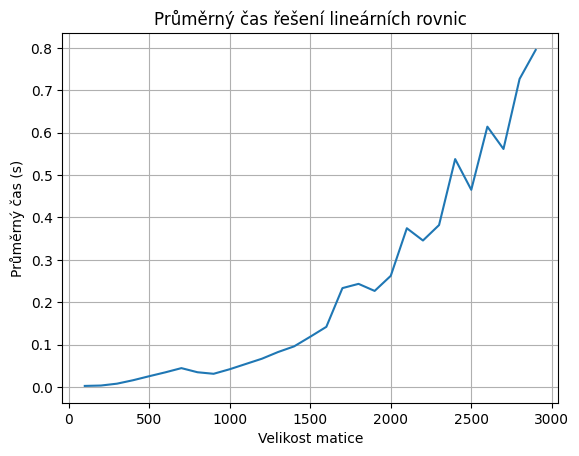

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def generate_linear_system(n):
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    return A, b

def solve_linear_system(A, b):
    start_time = time.time()
    x = np.linalg.solve(A, b)
    end_time = time.time()
    return x, end_time - start_time

matrix_sizes = range(100, 3000, 100)  # Velikosti čtvercových matic
avg_times = []

for size in matrix_sizes:
    total_time = 0
    iterations = 10  # Počet opakování pro výpočet průměrného času
    for _ in range(iterations):
        A, b = generate_linear_system(size)
        _, time_taken = solve_linear_system(A, b)
        total_time += time_taken
    avg_time = total_time / iterations
    avg_times.append(avg_time)

plt.plot(matrix_sizes, avg_times)
plt.xlabel('Velikost matice')
plt.ylabel('Průměrný čas (s)')
plt.title('Průměrný čas řešení lineárních rovnic')
plt.grid(True)
plt.show()


<ipython-input-22-ac137fa31022>:14: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
<ipython-input-22-ac137fa31022>:15: RuntimeWarning: overflow encountered in subtract
  if np.linalg.norm(x - x_new) < tolerance:


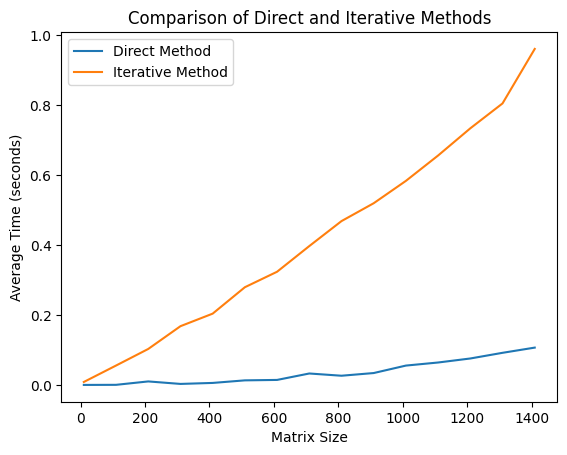

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def direct_method(A, b):
    return np.linalg.solve(A, b)

def iterative_method(A, b, max_iterations=100, tolerance=1e-1): #Jacobi method
    n = A.shape[0]
    x = np.zeros(n)
    for _ in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
        if np.linalg.norm(x - x_new) < tolerance:
            return x_new
        x = x_new
    return x

def generate_random_matrix(size):
    return np.random.rand(size, size)

def measure_average_time(size, method, iterations=100):
    total_time = 0
    for _ in range(iterations):
        A = generate_random_matrix(size)
        b = np.random.rand(size)
        start_time = time.time()
        method(A, b)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / iterations

matrix_sizes = range(10, 1500, 100)
direct_times = []
iterative_times = []

for size in matrix_sizes:
    direct_time = measure_average_time(size, direct_method)
    iterative_time = measure_average_time(size, iterative_method)
    direct_times.append(direct_time)
    iterative_times.append(iterative_time)

plt.plot(matrix_sizes, direct_times, label='Direct Method')
plt.plot(matrix_sizes, iterative_times, label='Iterative Method')
plt.xlabel('Matrix Size')
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.show()


<ipython-input-16-ac137fa31022>:14: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
<ipython-input-16-ac137fa31022>:15: RuntimeWarning: overflow encountered in subtract
  if np.linalg.norm(x - x_new) < tolerance:


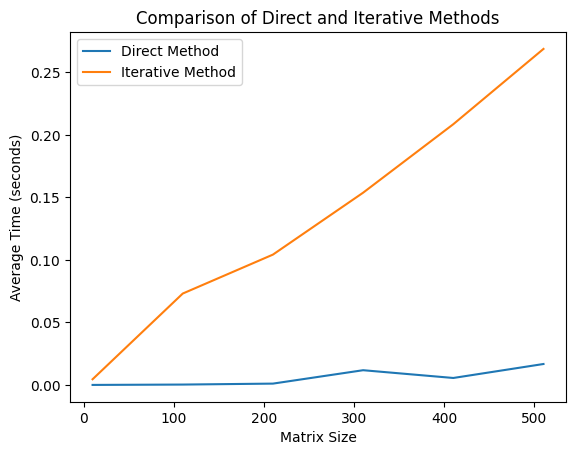

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg
import time

def direct_method(A, b):
    return np.linalg.solve(A, b)

def conjugate_gradient_method(A, b, tolerance=1e-1): #metoda konjugovaného gradientu
    x, _ = cg(A, b, tol=tolerance)
    return x

def generate_random_matrix(size):
    return np.random.rand(size, size)

def measure_average_time(size, method, iterations=100):
    total_time = 0
    for _ in range(iterations):
        A = generate_random_matrix(size)
        b = np.random.rand(size)
        start_time = time.time()
        method(A, b)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / iterations

matrix_sizes = range(10, 600, 100)
direct_times = []
iterative_times = []

for size in matrix_sizes:
    direct_time = measure_average_time(size, direct_method)
    iterative_time = measure_average_time(size, iterative_method)
    direct_times.append(direct_time)
    iterative_times.append(iterative_time)

plt.plot(matrix_sizes, direct_times, label='Direct Method')
plt.plot(matrix_sizes, iterative_times, label='Iterative Method')
plt.xlabel('Matrix Size')
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Direct and Iterative Methods')
plt.legend()
plt.show()


<ipython-input-21-a952c83f0bd0>:28: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (b[i] - sum1 - sum2) / matrix[i, i]
<ipython-input-21-a952c83f0bd0>:29: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = relaxation_factor * x_new[i] + (1 - relaxation_factor) * x[i]


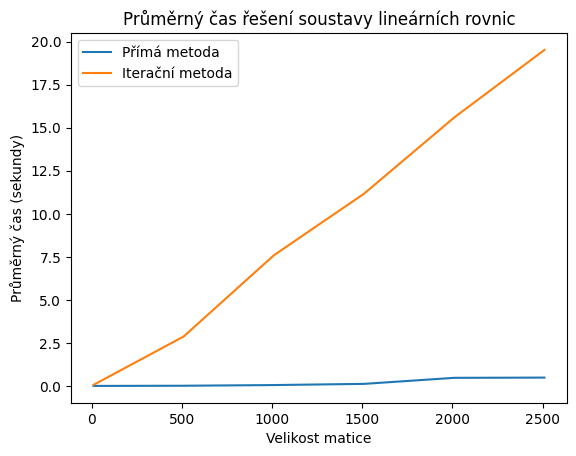

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def generate_matrix(size):
    # Generování náhodné čtvercové matice
    return np.random.rand(size, size)

def solve_direct(matrix):
    # Přímé řešení soustavy lineárních rovnic
    start_time = time.time()
    np.linalg.solve(matrix, np.random.rand(matrix.shape[0]))
    end_time = time.time()
    return end_time - start_time

def solve_iterative(matrix, relaxation_factor=1.0, max_iterations=1000, tolerance=1e-6): #relaxation method
    # Iterační řešení soustavy lineárních rovnic (metoda relaxace)
    start_time = time.time()
    n = matrix.shape[0]
    x = np.zeros(n)  # Počáteční odhad řešení
    b = np.random.rand(n)  # Pravá strana soustavy

    for _ in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            sum1 = np.dot(matrix[i, :i], x[:i])
            sum2 = np.dot(matrix[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - sum1 - sum2) / matrix[i, i]
            x_new[i] = relaxation_factor * x_new[i] + (1 - relaxation_factor) * x[i]

        if np.linalg.norm(x - x_new) < tolerance:
            break

        x = x_new

    end_time = time.time()
    return end_time - start_time

matrix_sizes = range(10, 3000, 500)  # Velikosti čtvercových matic
direct_times = []
iterative_times = []

for size in matrix_sizes:
    matrix = generate_matrix(size)
    direct_time = solve_direct(matrix)
    iterative_time = solve_iterative(matrix)
    direct_times.append(direct_time)
    iterative_times.append(iterative_time)

plt.plot(matrix_sizes, direct_times, label='Přímá metoda')
plt.plot(matrix_sizes, iterative_times, label='Iterační metoda')
plt.xlabel('Velikost matice')
plt.ylabel('Průměrný čas (sekundy)')
plt.title('Průměrný čas řešení soustavy lineárních rovnic')
plt.legend()
plt.show()


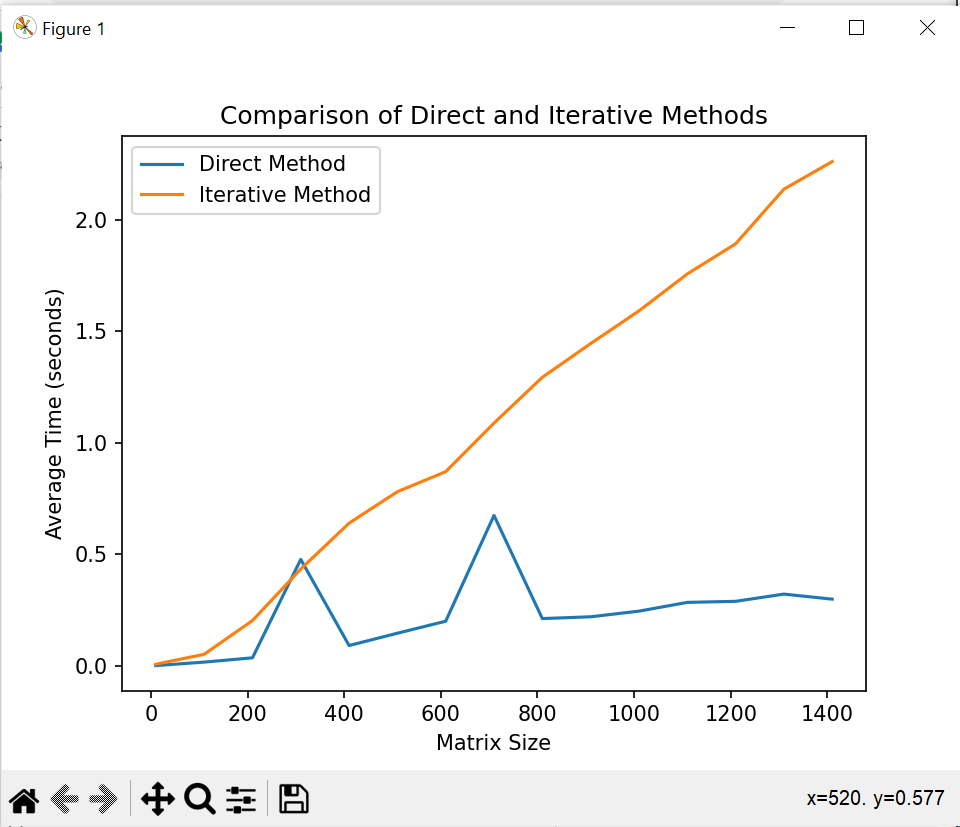